<a href="https://colab.research.google.com/github/NandanKumarSingh/research-internship/blob/main/research_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python pillow matplotlib

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

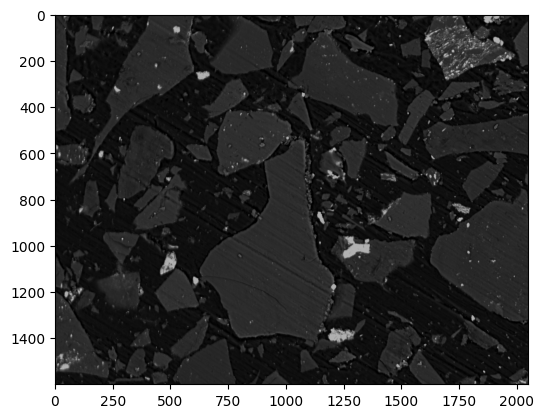

In [ ]:
# Load the image
image_path = '/content/2.tif'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.show()

In [ ]:
# Convert image to numpy array
image_np = np.array(image)
print(image_np.shape)  # Check dimensions (e.g., width, height, and channels if RGB)

(1600, 2048, 3)


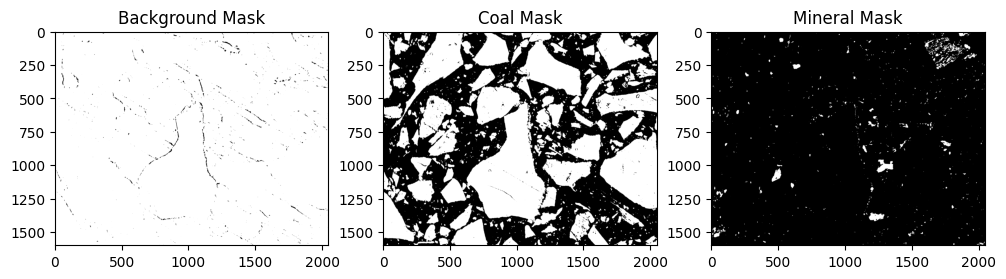

In [ ]:
import cv2

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Apply thresholds for the classes
_, background_mask = cv2.threshold(gray_image, 0, 27, cv2.THRESH_BINARY)  # Black - Background
_, coal_mask = cv2.threshold(gray_image, 28, 70, cv2.THRESH_BINARY)  # Grey - Coal
_, mineral_mask = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)  # White - Minerals

# Visualize the masks
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title("Background Mask")
plt.imshow(background_mask, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Coal Mask")
plt.imshow(coal_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Mineral Mask")
plt.imshow(mineral_mask, cmap='gray')

plt.show()

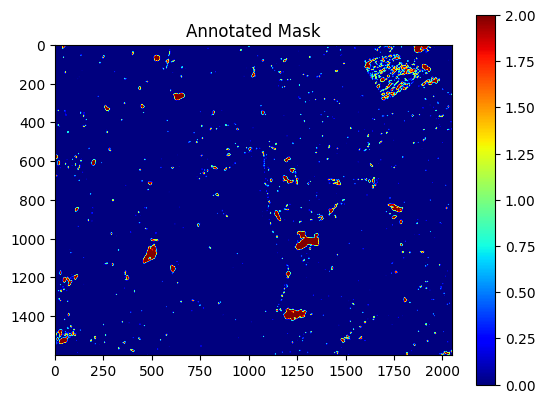

In [ ]:
# Create an empty mask with the same dimensions as the grayscale image
annotated_mask = np.zeros_like(gray_image)

# Assign labels
annotated_mask[background_mask == 255] = 0  # Background (black)
annotated_mask[coal_mask == 255] = 1  # Coal (grey)
annotated_mask[mineral_mask == 255] = 2  # Minerals (white)

# Visualize the annotated mask
plt.imshow(annotated_mask, cmap='jet')
plt.colorbar()
plt.title("Annotated Mask")
plt.show()

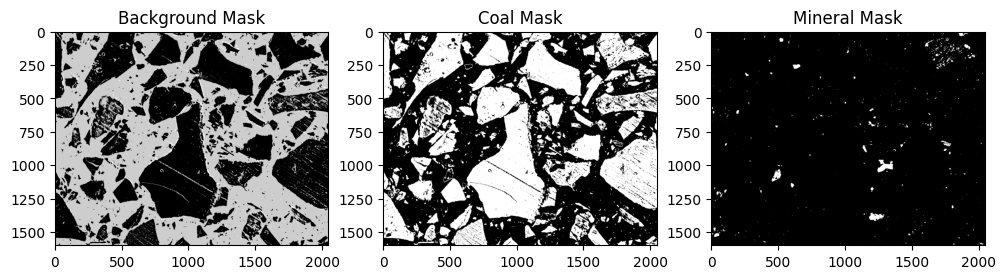

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Normalize the grayscale image for better thresholding
gray_image_normalized = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Threshold for background (assuming the background is the darkest region)
_, background_mask = cv2.threshold(gray_image_normalized, 0, 50, cv2.THRESH_BINARY)

# Invert the background mask so that background pixels are 1 and others are 0
background_mask = cv2.bitwise_not(background_mask)

# Threshold for coal (mid-gray tones)
coal_mask = cv2.inRange(gray_image_normalized, 51, 150)

# Threshold for minerals (brightest white areas)
mineral_mask = cv2.inRange(gray_image_normalized, 151, 255)

# Ensure no overlap: Remove coal and mineral regions from the background
background_mask[coal_mask == 255] = 0
background_mask[mineral_mask == 255] = 0

# Visualize the masks
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Background Mask")
plt.imshow(background_mask, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Coal Mask")
plt.imshow(coal_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Mineral Mask")
plt.imshow(mineral_mask, cmap='gray')

plt.show()

In [ ]:
# Applying morphological operations to clean up the masks
kernel = np.ones((5, 5), np.uint8)

# Clean up the background mask
background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, kernel)

# Clean up the coal mask
coal_mask = cv2.morphologyEx(coal_mask, cv2.MORPH_CLOSE, kernel)

# Clean up the mineral mask
mineral_mask = cv2.morphologyEx(mineral_mask, cv2.MORPH_CLOSE, kernel)

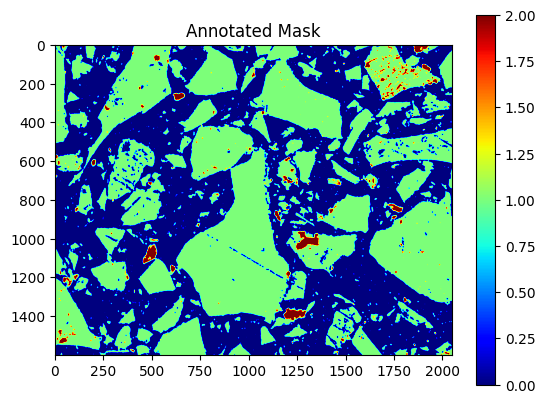

In [ ]:
annotated_mask = np.zeros_like(gray_image)

# Assign labels
annotated_mask[background_mask == 255] = 0  # Background (black)
annotated_mask[coal_mask == 255] = 1  # Coal (grey)
annotated_mask[mineral_mask == 255] = 2  # Minerals (white)

# Visualize the annotated mask
plt.imshow(annotated_mask, cmap='jet')
plt.colorbar()
plt.title("Annotated Mask")
plt.show()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import utils

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
os.chdir('/content/drive/MyDrive/Project/')

In [ ]:
print(os.getcwd())

/content/drive/MyDrive/Project


In [ ]:
def save_all_masks():
  for i in range(1,31):
    path="/content/drive/MyDrive/Project/images/"
    path=path+str(i)+"_RGB.tif"
    image=Image.open(path)
    image_np = np.array(image)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

    # Normalize the grayscale image for better thresholding
    gray_image_normalized = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

    # Threshold for background (assuming the background is the darkest region)
    _, background_mask = cv2.threshold(gray_image_normalized, 0, 50, cv2.THRESH_BINARY)

    # Invert the background mask so that background pixels are 1 and others are 0
    background_mask = cv2.bitwise_not(background_mask)

    # Threshold for coal (mid-gray tones)
    coal_mask = cv2.inRange(gray_image_normalized, 51, 150)

    # Threshold for minerals (brightest white areas)
    mineral_mask = cv2.inRange(gray_image_normalized, 151, 255)

    # Ensure no overlap: Remove coal and mineral regions from the background
    background_mask[coal_mask == 255] = 0
    background_mask[mineral_mask == 255] = 0
    # Applying morphological operations to clean up the masks
    kernel = np.ones((5, 5), np.uint8)

    # Clean up the background mask
    background_mask = cv2.morphologyEx(background_mask, cv2.MORPH_OPEN, kernel)

    # Clean up the coal mask
    coal_mask = cv2.morphologyEx(coal_mask, cv2.MORPH_CLOSE, kernel)

    # Clean up the mineral mask
    mineral_mask = cv2.morphologyEx(mineral_mask, cv2.MORPH_CLOSE, kernel)
    annotated_mask = np.zeros_like(gray_image)

    # Assign labels
    annotated_mask[background_mask == 255] = 0  # Background (black)
    annotated_mask[coal_mask == 255] = 1  # Coal (grey)
    annotated_mask[mineral_mask == 255] = 2  # Minerals (white)
    visual_mask = np.zeros_like(annotated_mask, dtype=np.uint8)
    visual_mask[annotated_mask == 0] = 0    # Background (black)
    visual_mask[annotated_mask == 1] = 128  # Coal (grey)
    visual_mask[annotated_mask == 2] = 255  # Minerals (white)
    annotated_image = Image.fromarray(visual_mask)
    annotated_image.save(f'/content/drive/MyDrive/Project/masks/{i}_mask.png')

In [ ]:
save_all_masks()

In [ ]:
import numpy as np

# Load the annotated image
annotated_image = Image.open('/content/drive/MyDrive/Project/masks/26_mask.png')

# Convert the image to a NumPy array
mask_array = np.array(annotated_image)
unique_values = np.unique(mask_array)
print("Unique values in the mask:", unique_values)

Unique values in the mask: [  0 128 255]


In [ ]:
# Map the grayscale values to class labels
mask_array_class_labels = np.zeros_like(mask_array)

mask_array_class_labels[mask_array == 0] = 0    # Background
mask_array_class_labels[mask_array == 128] = 1  # Coal
mask_array_class_labels[mask_array == 255] = 2  # Minerals

# Verify the conversion
print(np.unique(mask_array_class_labels))

[0 1 2]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Paths to images and masks
image_dir = '/content/drive/MyDrive/Project/images/'
mask_dir = '/content/drive/MyDrive/Project/masks/'

# Get list of image and mask filenames
image_filenames = sorted(os.listdir(image_dir))
mask_filenames = sorted(os.listdir(mask_dir))

# Initialize lists to hold images and masks
images = []
masks = []

# Loop through the files, read and resize images and masks
for image_filename, mask_filename in zip(image_filenames, mask_filenames):
  image_path = os.path.join(image_dir, image_filename)
  mask_path = os.path.join(mask_dir, mask_filename)

  # Read the image and mask
  image = cv2.imread(image_path)
  mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale

  # Resize both image and mask to 256x256
  image_resized = cv2.resize(image, (256, 256))
  mask_resized = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)

  # Map grayscale mask values to class labels
  mask_mapped = np.zeros_like(mask_resized)
  mask_mapped[mask_resized == 0] = 0    # Background
  mask_mapped[mask_resized == 128] = 1  # Coal
  mask_mapped[mask_resized == 255] = 2  # Minerals

  # Normalize image to range [0, 1]
  image_resized = image_resized / 255.0

  # Append to lists
  images.append(image_resized)
  masks.append(mask_mapped)

# Convert lists to numpy arrays
images = np.array(images)
masks = np.array(masks)

# Ensure masks are of type uint8
masks = masks.astype(np.uint8)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Print shape of datasets for confirmation
print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {y_val.shape}")

Training images shape: (24, 256, 256, 3)
Training masks shape: (24, 256, 256)
Validation images shape: (6, 256, 256, 3)
Validation masks shape: (6, 256, 256)


In [ ]:
def unet_model(input_size=(256, 256, 3)):
  inputs = layers.Input(input_size)

  # Encoding path
  conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
  conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
  pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
  conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
  pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

  conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
  conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
  pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

  conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
  conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
  pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

  # Bottleneck
  conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
  conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

  # Decoding path
  up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
  up6 = layers.concatenate([up6, conv4], axis=3)
  conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
  conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

  up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
  up7 = layers.concatenate([up7, conv3], axis=3)
  conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
  conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

  up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
  up8 = layers.concatenate([up8, conv2], axis=3)
  conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
  conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

  up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
  up9 = layers.concatenate([up9, conv1], axis=3)
  conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
  conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

  outputs = layers.Conv2D(3, 1, activation='softmax')(conv9)

  model = models.Model(inputs=[inputs], outputs=[outputs])

  return model

# Instantiate the model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_114 (Conv2D)       │ (None, 256, 256, 64)   │          1,792 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_115 (Conv2D)       │ (None, 256, 256, 64)   │         36,928 │ conv2d_114[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 128, 128, 64)   │              0 │ conv2d_115[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_116 (Conv2D)       │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_117 (Conv2D)       │ (None, 128, 128, 128)  │        147,584 │ conv2d_116[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25          │ (None, 64, 64, 128)    │              0 │ conv2d_117[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_118 (Conv2D)       │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_119 (Conv2D)       │ (None, 64, 64, 256)    │        590,080 │ conv2d_118[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_26          │ (None, 32, 32, 256)    │              0 │ conv2d_119[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_120 (Conv2D)       │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_121 (Conv2D)       │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_120[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_27          │ (None, 16, 16, 512)    │              0 │ conv2d_121[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_122 (Conv2D)       │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_27[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_123 (Conv2D)       │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_122[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_24       │ (None, 32, 32, 512)    │      2,097,664 │ conv2d_123[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_24       

 Total params: 31,031,875 (118.38 MB)

 Trainable params: 31,031,875 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=4
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 557ms/step - accuracy: 0.4039 - loss: 1.0309 - val_accuracy: 0.7468 - val_loss: 0.6740
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.5092 - loss: 0.8324 - val_accuracy: 0.7623 - val_loss: 0.6772
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.5628 - loss: 0.7595 - val_accuracy: 0.8472 - val_loss: 0.5891
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7371 - loss: 0.6508 - val_accuracy: 0.8816 - val_loss: 0.4872
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.7962 - loss: 0.5236 - val_accuracy: 0.8792 - val_loss: 0.4396
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.8128 - loss: 0.4857 - val_accuracy: 0.8844 - val_loss: 0.4160
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.8173 - loss: 0.4723 - val_accuracy: 0.8858 - val_loss: 0.3953
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.8440 - loss: 0.4100 - val_accuracy: 0.8862 - val_loss

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step - accuracy: 0.9074 - loss: 0.2518
Validation Loss: 0.25176525115966797
Validation Accuracy: 0.9073867797851562


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


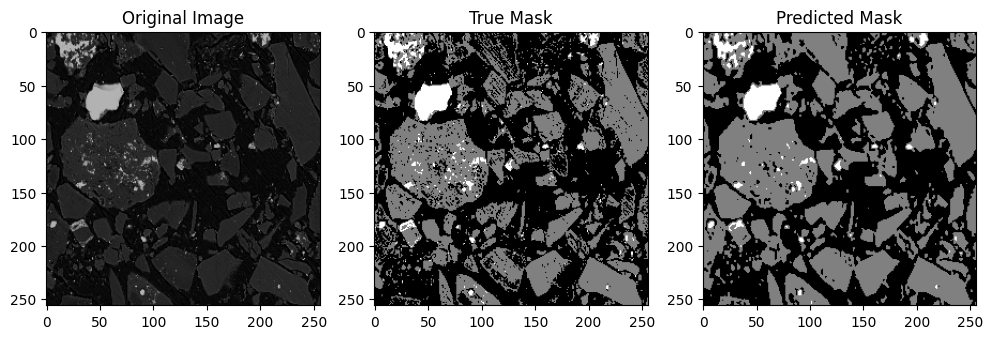

In [ ]:
# Predict on a validation image
pred_mask = model.predict(X_val[0:1])
pred_mask = np.argmax(pred_mask, axis=-1)[0]

# Display the original image, true mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(X_val[0])

plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(y_val[0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(pred_mask, cmap='gray')

plt.show()

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Project/unet_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

In [ ]:
def vgg16_unet(input_size=(256, 256, 3), num_classes=3):
  # Load the pre-trained VGG16 model, excluding the fully connected layers
  vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_size)

  # Freeze the VGG16 layers
  for layer in vgg16.layers:
      layer.trainable = False

  # Encoder (VGG16)
  conv1 = vgg16.get_layer("block1_conv2").output  # 256x256
  conv2 = vgg16.get_layer("block2_conv2").output  # 128x128
  conv3 = vgg16.get_layer("block3_conv3").output  # 64x64
  conv4 = vgg16.get_layer("block4_conv3").output  # 32x32
  conv5 = vgg16.get_layer("block5_conv3").output  # 16x16

  # Decoder
  up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
  up6 = layers.concatenate([up6, conv4], axis=3)
  conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
  conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

  up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
  up7 = layers.concatenate([up7, conv3], axis=3)
  conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
  conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

  up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
  up8 = layers.concatenate([up8, conv2], axis=3)
  conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
  conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

  up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
  up9 = layers.concatenate([up9, conv1], axis=3)
  conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
  conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

  outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(conv9)

  # Create the model
  model = models.Model(inputs=[vgg16.input], outputs=[outputs])

  # Compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

# Instantiate the model
model2 = vgg16_unet()

# Print model summary
model2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 256, 256, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 256, 256, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 128, 128, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 128, 128, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 128, 128, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 64, 64, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 64, 64, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 32, 32, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 32, 32, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 16, 16, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 25,854,787 (98.63 MB)

 Trainable params: 11,140,099 (42.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the VGG16-based U-Net model
history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=4
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step - accuracy: 0.5247 - loss: 1.2767 - val_accuracy: 0.7562 - val_loss: 0.6507
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.5547 - loss: 0.7452 - val_accuracy: 0.6190 - val_loss: 0.6987
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.7273 - loss: 0.6180 - val_accuracy: 0.7320 - val_loss: 0.6128
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7742 - loss: 0.5473 - val_accuracy: 0.6244 - val_loss: 0.7682
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.6948 - loss: 0.6177 - val_accuracy: 0.4330 - val_loss: 0.9632
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.6854 - loss: 0.6036 - val_accuracy: 0.7377 - val_loss: 0.5794
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.7921 - loss: 0.4839 - val_accuracy: 0.8424 - val_loss: 0.4047
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.8000 - loss: 0.4592 - val_accuracy: 0.8141 - val_loss

In [ ]:
# Save the trained model
model2.save('/content/drive/MyDrive/Project/vgg16_unet_model.h5')

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model2.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9086 - loss: 0.2294
Validation Loss: 0.2294444888830185
Validation Accuracy: 0.9085642695426941


In [ ]:
def calculate_mean_iou(y_true, y_pred, num_classes):
  iou_scores = []

  for i in range(num_classes):
    intersection = np.sum((y_true == i) & (y_pred == i))
    union = np.sum((y_true == i) | (y_pred == i))
    if union == 0:
        iou = float('nan')  # To handle cases where there is no object of that class
    else:
        iou = intersection / union
    iou_scores.append(iou)

  # Calculate the mean, ignoring NaN values
  mean_iou = np.nanmean(iou_scores)

  return mean_iou

# Predict on the validation set
y_pred = model2.predict(X_val)
y_pred = np.argmax(y_pred, axis=-1)

# Calculate the mean IoU for the validation set
mean_iou = calculate_mean_iou(y_val, y_pred, num_classes=3)
print(f"Mean IoU for validation set: {mean_iou}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
Mean IoU for validation set: 0.7600210222281465


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


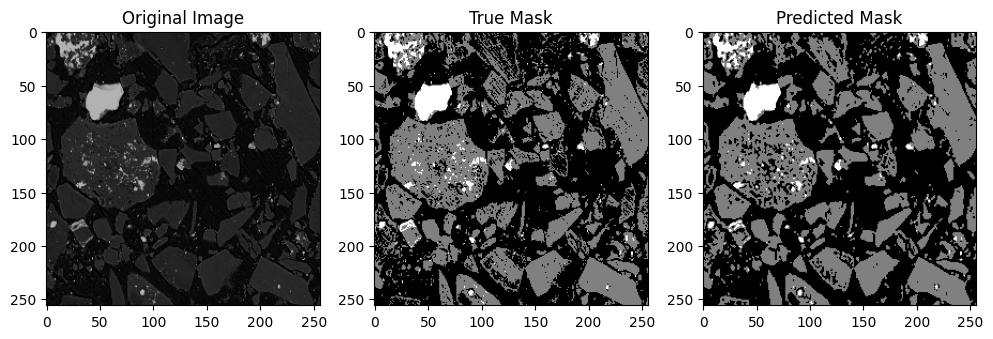

In [ ]:
# Predict on a validation image
pred_mask = model2.predict(X_val[0:1])
pred_mask = np.argmax(pred_mask, axis=-1)[0]

# Display the original image, true mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(X_val[0])

plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(y_val[0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(pred_mask, cmap='gray')

plt.show()

In [ ]:
import tensorflow as tf

# Re-define the U-Net model, ensuring the metric uses MeanIoU
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoding path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(3, 1, activation='softmax')(conv9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    # Compile the model with the IoU metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate and compile the model with the IoU metric
model3 = unet_model()

In [ ]:
# Train the model
history = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=4
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8191 - loss: 0.4683 - val_accuracy: 0.8813 - val_loss: 0.4133
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.8087 - loss: 0.4547 - val_accuracy: 0.8771 - val_loss: 0.3824
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.8345 - loss: 0.4152 - val_accuracy: 0.8948 - val_loss: 0.3385
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.8188 - loss: 0.4368 - val_accuracy: 0.8924 - val_loss: 0.3155
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.8142 - loss: 0.3941 - val_accuracy: 0.8890 - val_loss: 0.3432
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.8415 - loss: 0.3764 - val_accuracy: 0.8981 - val_loss: 0.2926
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.8437 - loss: 0.3588 - val_accuracy: 0.8968 - val_loss: 0.2961
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.8586 - loss: 0.3360 - val_accuracy: 0.8917 - val_loss:

In [ ]:
def calculate_mean_iou(y_true, y_pred, num_classes):
  iou_scores = []

  for i in range(num_classes):
    intersection = np.sum((y_true == i) & (y_pred == i))
    union = np.sum((y_true == i) | (y_pred == i))
    if union == 0:
        iou = float('nan')  # To handle cases where there is no object of that class
    else:
        iou = intersection / union
    iou_scores.append(iou)

  # Calculate the mean, ignoring NaN values
  mean_iou = np.nanmean(iou_scores)

  return mean_iou

# Predict on the validation set
y_pred = model3.predict(X_val)
y_pred = np.argmax(y_pred, axis=-1)

# Calculate the mean IoU for the validation set
mean_iou = calculate_mean_iou(y_val, y_pred, num_classes=3)
print(f"Mean IoU for validation set: {mean_iou}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean IoU for validation set: 0.7135320304481686
